In [32]:
import pandas as pd 

data = pd.read_csv('C:\\Users\\lclai\\Desktop\\data_dementia\\clean\\dementia_related_comordibities.csv')
data

,AGE,GENDER,DEMENTIA,ETHNICITY,MARITAL_STATUS,HYPERTENSION,CARDIOVASCULAR_DISEASE,SLEEP_DISORDERS,DEPRESSION,HYPERLIPIDEMIA,STROKE,DIABETES,UTI,RESPIRATORY_FAILURE,ANEMIA,PNEUMONIA,KIDNEY_DISEASE
0,72,M,1,WHITE,MARRIED,1,1,0,0,0,0,0,0,0,0,1,0
1,87,F,1,WHITE,OTHER,0,0,0,1,0,0,1,1,0,0,0,0
2,88,M,1,WHITE,OTHER,0,1,0,0,0,0,0,0,0,0,0,0
3,73,M,1,WHITE,UNMARRIED,1,1,0,1,0,1,0,0,0,0,0,0
4,70,M,1,WHITE,UNMARRIED,1,1,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48144,72,M,0,WHITE,MARRIED,0,1,0,0,0,0,0,0,0,0,0,1
48145,82,M,0,WHITE,MARRIED,1,1,0,0,0,0,0,0,0,0,0,0
48146,68,F,0,OTHER,OTHER,0,1,0,0,0,0,0,0,0,1,0,0
48147,69,F,0,WHITE,OTHER,0,1,0,0,0,0,0,0,0,0,1,1


In [33]:
import pandas as pd
import numpy as np

Q1 = data['AGE'].quantile(0.25)
Q3 = data['AGE'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_filtered = data[(data['AGE'] >= lower_bound) & (data['AGE'] <= upper_bound)]


In [34]:
import numpy as np
import pandas as pd

df_alzheimer = data_filtered[data_filtered['DEMENTIA'] == 1]
df_no_alzheimer = data_filtered[data_filtered['DEMENTIA'] == 0]

df_no_alzheimer_sampled_list = []

binary_cols = [col for col in data_filtered.columns if data_filtered[col].nunique() == 2 and col not in ['DEMENTIA', 'GENDER', 'MARITAL_STATUS', 'ETHNICITY']]


for (age, gender), group in df_alzheimer.groupby(['AGE', 'GENDER']):

    matched_controls = df_no_alzheimer[(df_no_alzheimer['AGE'] == age) & (df_no_alzheimer['GENDER'] == gender)].copy()

    if len(matched_controls) > len(group):
        matched_controls.loc[:, 'difference'] = matched_controls[binary_cols].apply(
            lambda row: np.abs(row - group[binary_cols].mean()).sum(), axis=1
        )

        matched_controls = matched_controls.nsmallest(len(group), 'difference') #nsmallest para los mas similares

    df_no_alzheimer_sampled_list.append(matched_controls)

df_no_alzheimer_sampled = pd.concat(df_no_alzheimer_sampled_list, ignore_index=True)

df_balanced = pd.concat([df_alzheimer, df_no_alzheimer_sampled], ignore_index=True)

df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

print(f"Casos después de undersampling: {df_balanced['DEMENTIA'].sum()}")
print(f"Controles después de undersampling: {len(df_balanced) - df_balanced['DEMENTIA'].sum()}")


Casos después de undersampling: 3404
Controles después de undersampling: 3404


In [35]:
df_balanced

,AGE,GENDER,DEMENTIA,ETHNICITY,MARITAL_STATUS,HYPERTENSION,CARDIOVASCULAR_DISEASE,SLEEP_DISORDERS,DEPRESSION,HYPERLIPIDEMIA,STROKE,DIABETES,UTI,RESPIRATORY_FAILURE,ANEMIA,PNEUMONIA,KIDNEY_DISEASE,difference
0,70,F,0,OTHER,OTHER,1,1,0,0,0,0,0,0,0,0,0,0,3.000000
1,61,F,1,OTHER,MARRIED,1,1,0,0,0,0,1,0,0,0,0,0,NaN
2,85,F,1,WHITE,OTHER,1,1,0,0,0,0,0,0,0,0,0,0,NaN
3,58,F,0,WHITE,MARRIED,1,1,0,0,1,0,0,0,0,0,0,0,2.466667
4,48,F,0,OTHER,UNMARRIED,1,1,0,0,0,0,0,0,0,0,0,0,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6803,46,F,0,WHITE,MARRIED,0,0,0,0,0,0,0,0,0,0,0,0,1.928571
6804,74,M,0,WHITE,MARRIED,1,1,0,0,0,0,0,0,0,0,0,0,2.911765
6805,75,F,0,WHITE,MARRIED,1,1,0,0,0,0,0,0,0,0,0,0,3.575000
6806,76,M,0,WHITE,UNMARRIED,1,1,0,0,0,0,1,0,0,0,0,0,3.097561


In [36]:
df_balanced.columns

Index(['AGE', 'GENDER', 'DEMENTIA', 'ETHNICITY', 'MARITAL_STATUS',
       'HYPERTENSION', 'CARDIOVASCULAR_DISEASE', 'SLEEP_DISORDERS',
       'DEPRESSION', 'HYPERLIPIDEMIA', 'STROKE', 'DIABETES', 'UTI',
       'RESPIRATORY_FAILURE', 'ANEMIA', 'PNEUMONIA', 'KIDNEY_DISEASE',
       'difference'],
      dtype='object')

In [37]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

label_encoder = LabelEncoder()

df_balanced['ETHNICITY'] = label_encoder.fit_transform(df_balanced['ETHNICITY'])
df_balanced['MARITAL_STATUS'] = label_encoder.fit_transform(df_balanced['MARITAL_STATUS'])
df_balanced['GENDER'] = label_encoder.fit_transform(df_balanced['GENDER'])

scaler = StandardScaler()
df_balanced['AGE'] = scaler.fit_transform(df_balanced[['AGE']])
df_balanced


,AGE,GENDER,DEMENTIA,ETHNICITY,MARITAL_STATUS,HYPERTENSION,CARDIOVASCULAR_DISEASE,SLEEP_DISORDERS,DEPRESSION,HYPERLIPIDEMIA,STROKE,DIABETES,UTI,RESPIRATORY_FAILURE,ANEMIA,PNEUMONIA,KIDNEY_DISEASE,difference
0,0.096870,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,3.000000
1,-0.464878,0,1,1,0,1,1,0,0,0,0,1,0,0,0,0,0,NaN
2,1.033117,0,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0,NaN
3,-0.652127,0,0,2,0,1,1,0,0,1,0,0,0,0,0,0,0,2.466667
4,-1.276292,0,0,1,2,1,1,0,0,0,0,0,0,0,0,0,0,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6803,-1.401125,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1.928571
6804,0.346536,1,0,2,0,1,1,0,0,0,0,0,0,0,0,0,0,2.911765
6805,0.408953,0,0,2,0,1,1,0,0,0,0,0,0,0,0,0,0,3.575000
6806,0.471369,1,0,2,2,1,1,0,0,0,0,1,0,0,0,0,0,3.097561


In [43]:
from sklearn.model_selection import train_test_split

y = df_balanced['DEMENTIA']  
X = df_balanced.drop(columns=['DEMENTIA','difference']) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,  StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rf = RandomForestClassifier(random_state=42)

rf_param_grid = {
    'n_estimators': [100, 500],  
    'max_depth': [10, 20, 30, None],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'max_features': ['sqrt'],
}

rf_grid_search = GridSearchCV(rf, rf_param_grid, cv=cv, scoring='roc_auc', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

print("Best parameters found: ", rf_grid_search.best_params_)
print(f"Random Forest AUC: {rf_grid_search.best_score_}")

Best parameters found:  {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 500}
Random Forest AUC: 0.925463770413826


In [45]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

y_proba = rf_grid_search.best_estimator_.predict_proba(X_test)[:, 1] 
auc = roc_auc_score(y_test, y_proba)
print(f"AUC: {auc}")

AUC: 0.9261434532354796


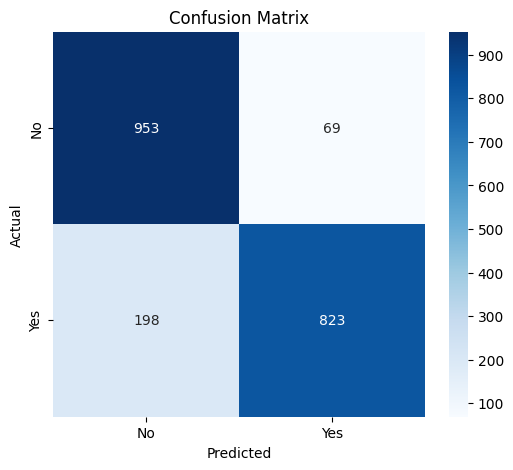

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      1022
           1       0.92      0.81      0.86      1021

    accuracy                           0.87      2043
   macro avg       0.88      0.87      0.87      2043
weighted avg       0.88      0.87      0.87      2043

AUC: 0.9261434532354796


In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

y_pred = (y_proba >= 0.5).astype(int)  

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred))

auc = roc_auc_score(y_test, y_proba)
print(f"AUC: {auc}")

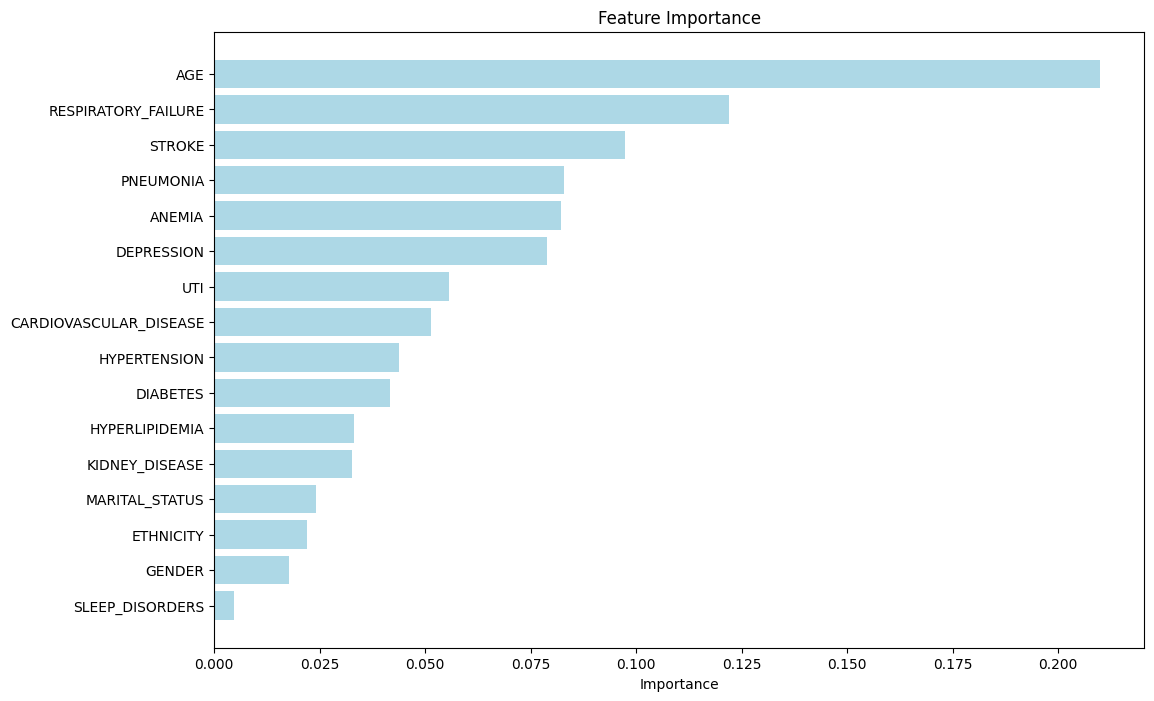

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

feature_importances = rf_grid_search.best_estimator_.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='lightblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  
plt.show()

In [48]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_auc_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rf = RandomForestClassifier(random_state=42)
rf_param_grid = {
    'n_estimators': [100, 500],  
    'max_depth': [10, 20, 30, None],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'max_features': ['sqrt'],
}

rf_grid_search = GridSearchCV(rf, rf_param_grid, cv=cv, scoring='roc_auc', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_param_grid = {
    'n_estimators': [100, 500],  
    'max_depth': [3, 6, 10],  
    'learning_rate': [0.01, 0.1, 0.3],  
    'subsample': [0.8, 1],
}

xgb_grid_search = GridSearchCV(xgb, xgb_param_grid, cv=cv, scoring='roc_auc', n_jobs=-1)
xgb_grid_search.fit(X_train, y_train)

rf_proba = rf_grid_search.best_estimator_.predict_proba(X_test)[:, 1]  
xgb_proba = xgb_grid_search.best_estimator_.predict_proba(X_test)[:, 1]  

ensemble_proba = (rf_proba + xgb_proba) / 2  

auc = roc_auc_score(y_test, ensemble_proba)
print(f"AUC (Ensemble RF + XGB): {auc}")

print("Best RF parameters: ", rf_grid_search.best_params_)
print("Best XGB parameters: ", xgb_grid_search.best_params_)


AUC (Ensemble RF + XGB): 0.9311479478888546
Best RF parameters:  {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 500}
Best XGB parameters:  {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100, 'subsample': 1}
